In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(178, 14)

In [7]:
target=df[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [8]:
feature=df.drop('Type',axis=1)
feature

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=100)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133, 1)
(45, 1)


In [12]:
knn=KNeighborsClassifier(n_neighbors=5)  ##PCA by using KNN

In [13]:
knn.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [14]:
y_pred=knn.predict(x_test)

In [15]:
accuracy_score(y_test,y_pred)

0.6

In [16]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 3, 12,  2],
       [ 1, 12,  5]], dtype=int64)

In [19]:
pca=PCA(n_components=12)

In [20]:
x_train_new=pca.fit_transform(x_train)
x_test_new=pca.fit_transform(x_test)

In [21]:
print(x_train_new.shape)
print(x_test_new.shape)

(133, 12)
(45, 12)


In [23]:
knn.fit(x_train_new,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [24]:
y_pred_new=knn.predict(x_test_new)

In [25]:
y_pred_new

array([3, 2, 1, 1, 3, 3, 2, 3, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 3,
       1], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred_new)

0.6888888888888889

In [27]:
confusion_matrix(y_test,y_pred_new)

array([[10,  0,  0],
       [ 3,  9,  5],
       [ 2,  4, 12]], dtype=int64)

<AxesSubplot:>

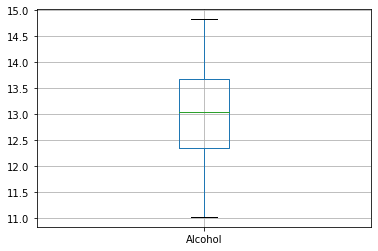

In [32]:
df.boxplot('Alcohol')

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Proline', ylabel='Density'>

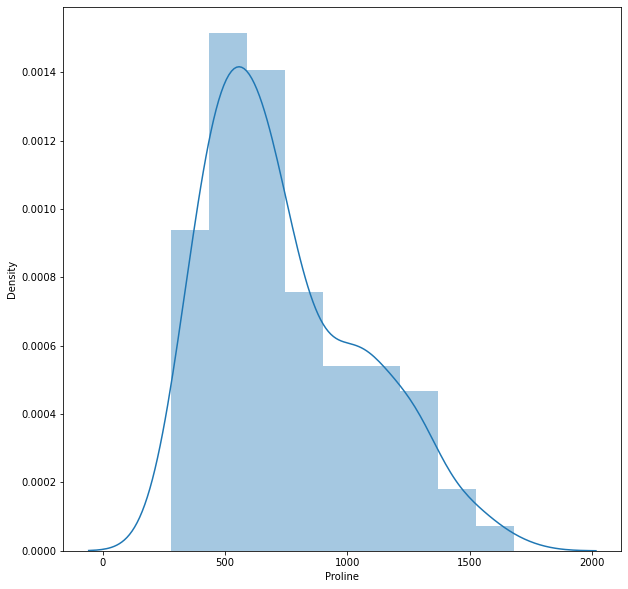

In [34]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['Proline'])

<AxesSubplot:>

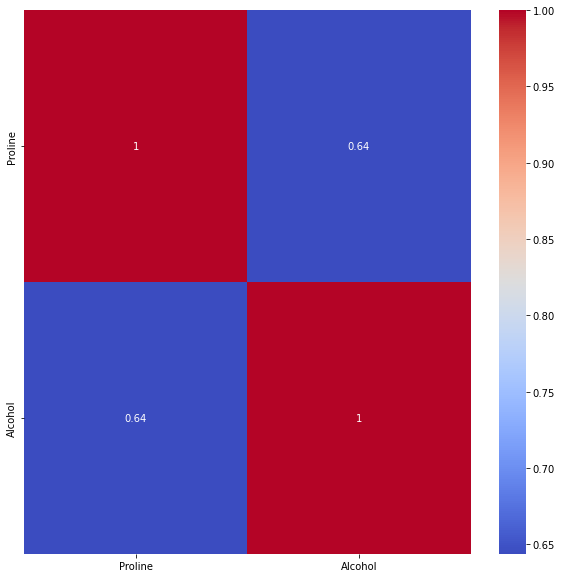

In [108]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df[['Proline','Alcohol']].corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

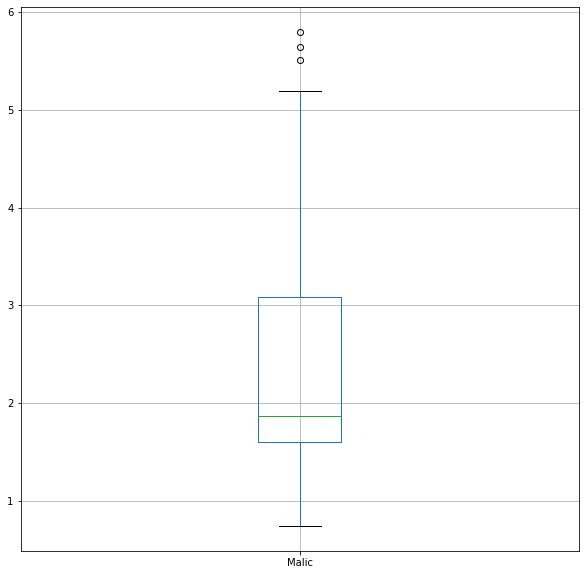

In [109]:
fig=plt.figure(figsize=(10,10))
df.boxplot('Malic')

<AxesSubplot:>

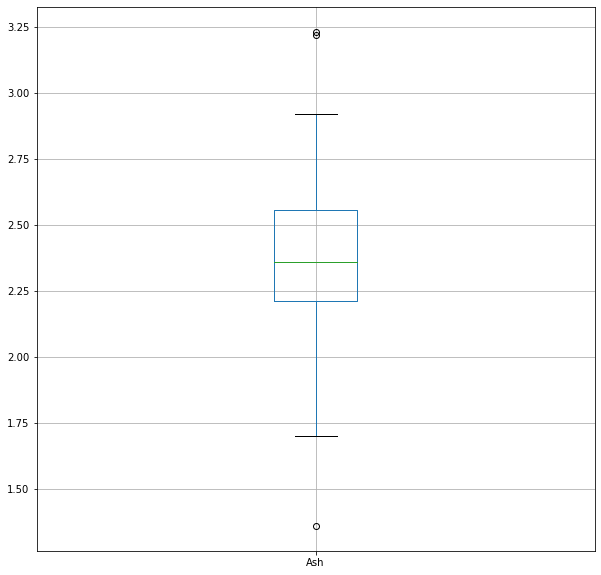

In [110]:
fig=plt.figure(figsize=(10,10))
df.boxplot('Ash')

In [42]:
Q1=df['Malic'].quantile(0.25)
Q1

1.6025

In [43]:
Q3=df['Malic'].quantile(0.75)
Q3

3.0825

In [44]:
IQR=Q3-Q1
IQR

1.48

In [45]:
lower=Q1-1.5*IQR
lower

-0.6174999999999997

In [46]:
upper=Q3+1.5*IQR
upper

5.3025

In [47]:
outliers_malic=df[(df.Malic<lower) | (df.Malic>upper)]  ##outliers for the malic column.
outliers_malic

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [50]:
df['Malic'].skew()

1.0396511925814442

In [51]:
df['Malic'].kurt()

0.2992066798717512

In [48]:
Q1=df['Ash'].quantile(0.25)
Q1

2.21

In [49]:
Q3=df['Ash'].quantile(0.75)
Q3

2.5575

In [52]:
IQR=Q3-Q1
IQR

0.34750000000000014

In [53]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [54]:
outliers_ash=df[(df.Ash<lower) | (df.Ash>upper)]  ##outliers for the ash column.
outliers_ash

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Magnesium', ylabel='Density'>

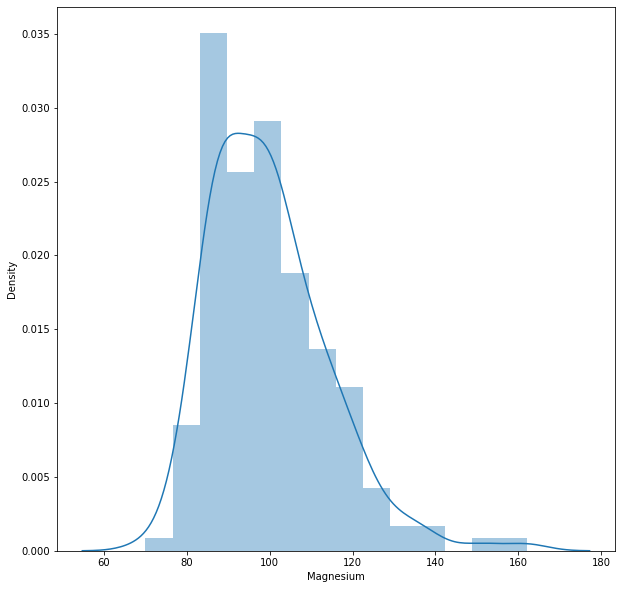

In [58]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['Magnesium'])

In [59]:
##pca by using Logistic Regression.

In [60]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=100)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142, 1)
(36, 1)


In [62]:
log_model=LogisticRegression()

In [63]:
log_model.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred1=log_model.predict(x_test)
y_pred1

array([2, 3, 1, 1, 3, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred1)

0.9444444444444444

In [70]:
confusion_matrix(y_test,y_pred1)

array([[ 8,  0,  0],
       [ 2, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [81]:
pca=PCA(n_components=0.94)

In [82]:
x_train_new1=pca.fit_transform(x_train)
x_test_new1=pca.fit_transform(x_test)

In [83]:
print(x_train_new1.shape)
print(x_test_new1.shape)

(142, 1)
(36, 1)


In [84]:
log_model.fit(x_train_new1,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [85]:
y_pred2=log_model.predict(x_test_new1)
y_pred2

array([3, 3, 1, 1, 3, 2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred2)

0.6388888888888888

In [87]:
confusion_matrix(y_test,y_pred2)

array([[8, 0, 0],
       [2, 9, 4],
       [1, 6, 6]], dtype=int64)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Magnesium', ylabel='Density'>

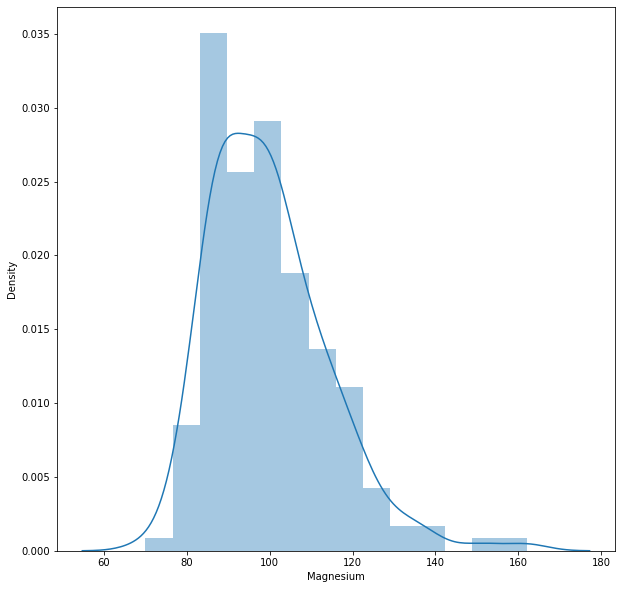

In [88]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['Magnesium'])

<AxesSubplot:>

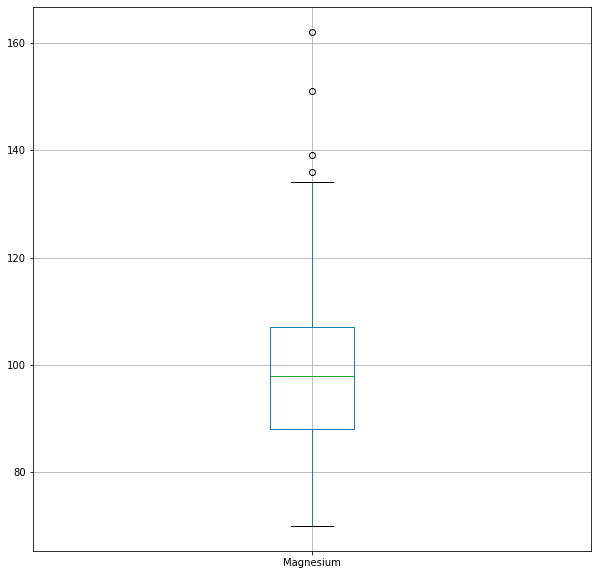

In [111]:
fig=plt.figure(figsize=(10,10))
df.boxplot('Magnesium')

In [89]:
df['Magnesium'].skew()

1.098191054755161

In [90]:
df['Magnesium'].kurt()

2.1049913235905557

In [91]:
Q1=df['Magnesium'].quantile(0.25)
Q1

88.0

In [92]:
Q3=df['Magnesium'].quantile(0.75)
Q3

107.0

In [93]:
IQR=Q3-Q1
IQR

19.0

In [94]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [96]:
outliers_magnesium=df[(df.Magnesium<lower) | (df.Magnesium>upper)]  ##outliers for magnesium column.
outliers_magnesium

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


<AxesSubplot:>

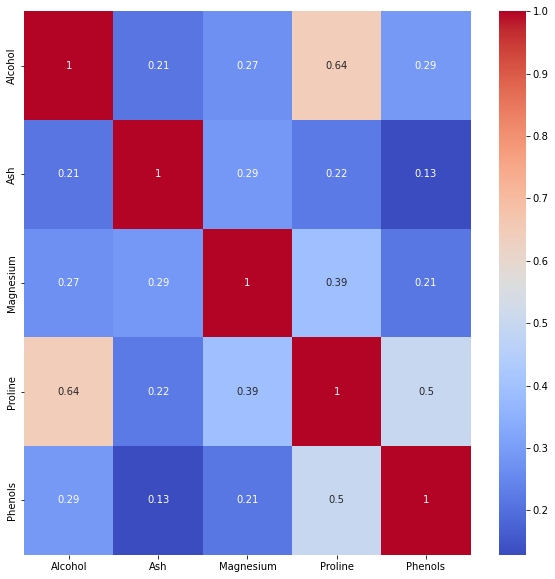

In [106]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df[['Alcohol','Ash','Magnesium','Proline','Phenols']].corr(),annot=True,cmap='coolwarm')

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
##PCA by using linear model:-

In [120]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.85,random_state=100)

In [122]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 13)
(27, 13)
(151, 1)
(27, 1)


In [123]:
lin_model=LinearRegression()

In [124]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [129]:
y_pred3=lin_model.predict(x_test)

In [131]:
from sklearn.metrics import r2_score

In [132]:
r2_score(y_test,y_pred3)

0.8878003396163976

In [133]:
pca=PCA(n_components=0.88)

In [134]:
x_train_new2=pca.fit_transform(x_train)
x_test_new2=pca.fit_transform(x_test)

In [135]:
print(x_train_new2.shape)
print(x_test_new2.shape)

(151, 1)
(27, 1)


In [136]:
lin_model.fit(x_train_new2,y_train)

LinearRegression()

In [138]:
y_pred4=lin_model.predict(x_test_new2)

In [139]:
r2_score(y_test,y_pred4)

0.383369521833249

In [140]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<AxesSubplot:>

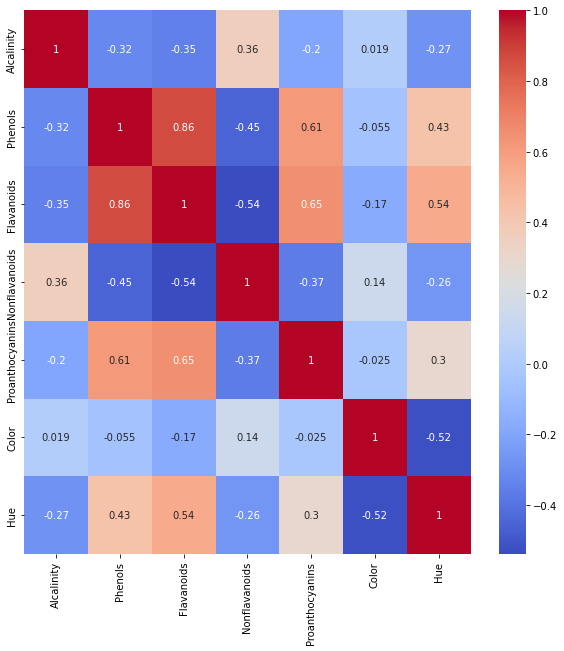

In [141]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df[['Alcalinity','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue']].corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

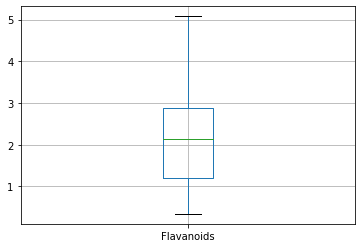

In [142]:
df.boxplot('Flavanoids')  ##it has no outliers

<AxesSubplot:>

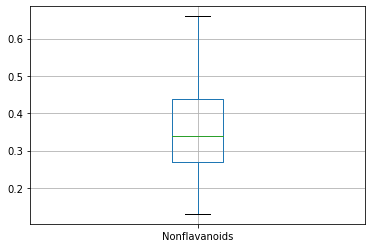

In [143]:
df.boxplot('Nonflavanoids')  ##it has no outliers

<AxesSubplot:>

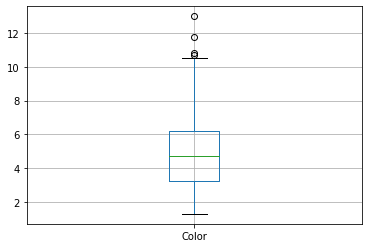

In [144]:
df.boxplot('Color')  ##It has outliers so we wiil see.

In [145]:
Q1=df['Color'].quantile(0.25)
Q1

3.2199999999999998

In [146]:
Q3=df['Color'].quantile(0.75)
Q3

6.2

In [147]:
IQR=Q3-Q1
IQR

2.9800000000000004

In [148]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [149]:
outliers_color=df[(df.Color<lower) | (df.Color>upper)]
outliers_color

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
